<img src="https://drive.google.com/uc?export=view&id=1wYSMgJtARFdvTt5g7E20mE4NmwUFUuog" width="200">

[![Build Fast with AI](https://img.shields.io/badge/BuildFastWithAI-GenAI%20Bootcamp-blue?style=for-the-badge&logo=artificial-intelligence)](https://www.buildfastwithai.com/genai-course)
[![EduChain GitHub](https://img.shields.io/github/stars/satvik314/educhain?style=for-the-badge&logo=github&color=gold)](https://github.com/satvik314/educhain)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/107m638i9vDD7FDXqHwyQyfGTig8uxMst?usp=sharing)
## Master Generative AI in 6 Weeks
**What You'll Learn:**
- Build with Latest LLMs
- Create Custom AI Apps
- Learn from Industry Experts
- Join Innovation Community
Transform your AI ideas into reality through hands-on projects and expert mentorship.
[Start Your Journey](https://www.buildfastwithai.com/genai-course)
*Empowering the Next Generation of AI Innovators

##**Docling** parses documents and exports them to the desired format with ease and speed.

###  **Features**:-
* 🗂️ Reads popular document formats (PDF, DOCX, PPTX, XLSX, Images, HTML, AsciiDoc & Markdown) and exports to HTML, Markdown and JSON (with embedded and referenced images)
* 📑 Advanced PDF document understanding incl. page layout, reading order & table structures
* 🧩 Unified, expressive DoclingDocument representation format
* 🤖 Plug-and-play integrations incl. LangChain, LlamaIndex, Crew AI & Haystack for agentic AI
* 🔍 OCR support for scanned PDFs
* 💻 Simple and convenient CLI




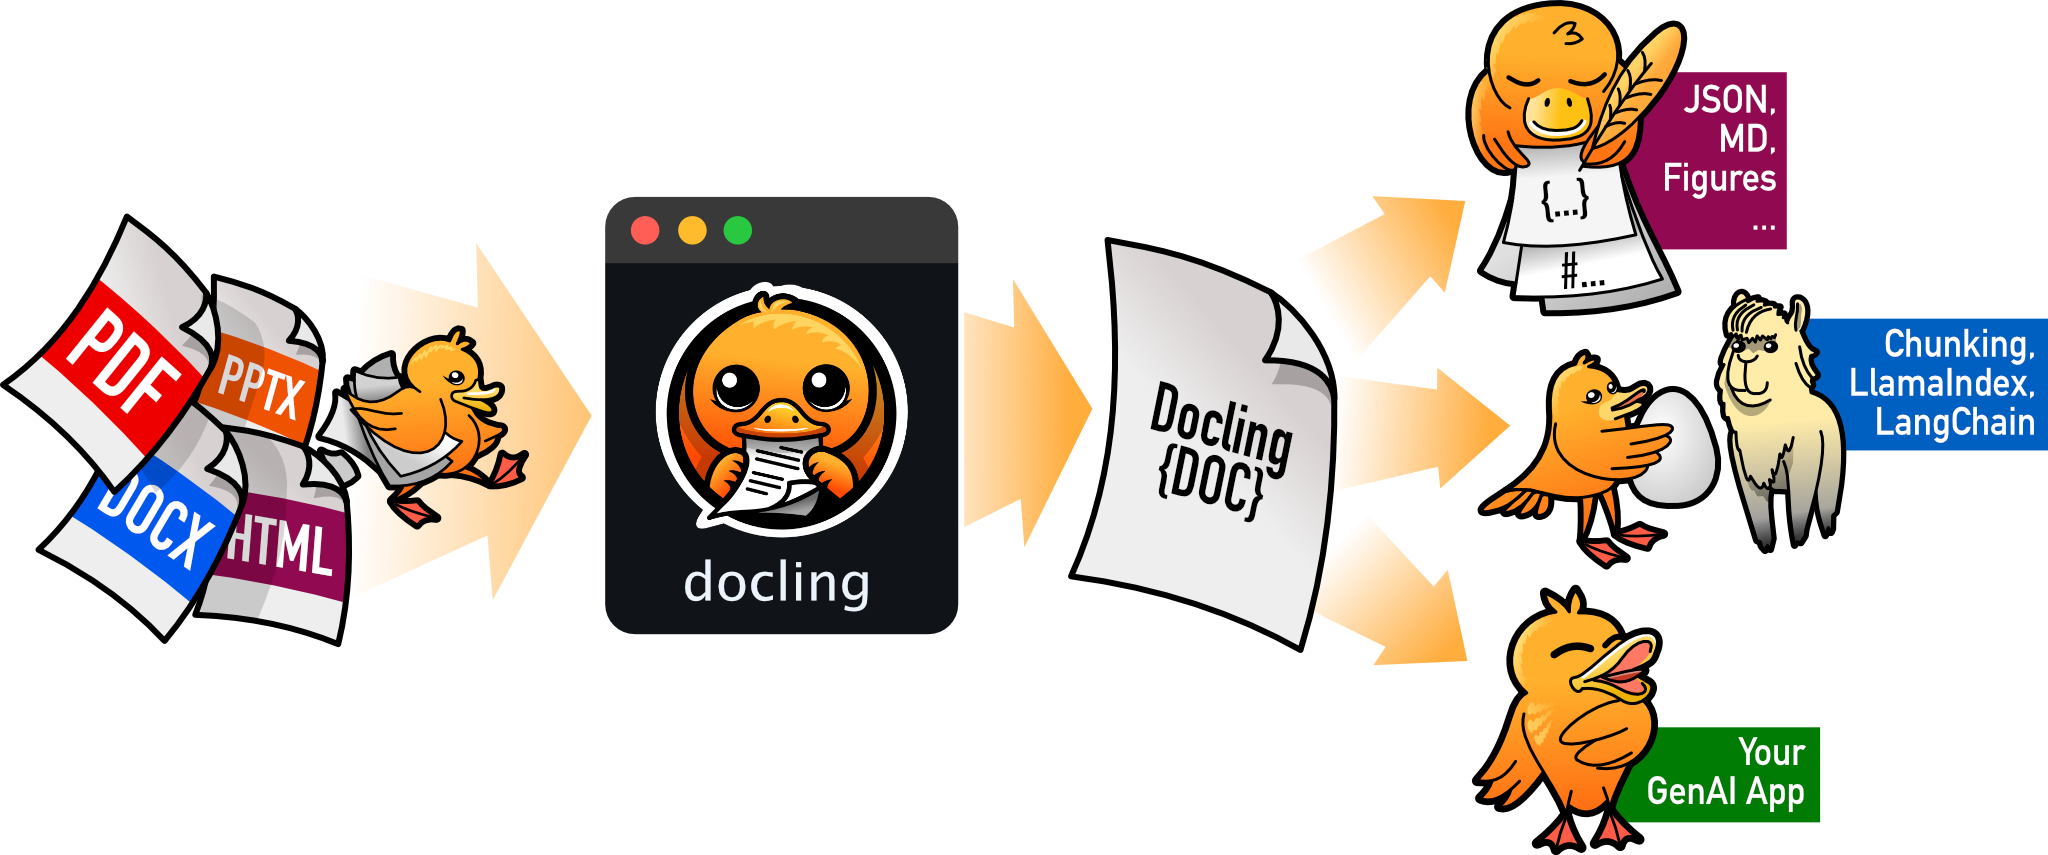

###**Setup and Installation**

In [ ]:
!pip install docling

###Simple conversion


In [ ]:
from docling.document_converter import DocumentConverter

source = "https://arxiv.org/pdf/2408.09869"  # document per local path or URL
converter = DocumentConverter()
result = converter.convert(source)
print(result.document.export_to_markdown())
# output: ## Docling Technical Report [...]"

###Custom conversion


All Parse Result Stored in Colab Files

In [ ]:
import json
import logging
import time
from pathlib import Path

from docling.backend.pypdfium2_backend import PyPdfiumDocumentBackend
from docling.datamodel.base_models import InputFormat
from docling.datamodel.pipeline_options import (
    AcceleratorDevice,
    AcceleratorOptions,
    PdfPipelineOptions,
)
from docling.document_converter import DocumentConverter, PdfFormatOption
from docling.models.ocr_mac_model import OcrMacOptions
from docling.models.tesseract_ocr_cli_model import TesseractCliOcrOptions
from docling.models.tesseract_ocr_model import TesseractOcrOptions

_log = logging.getLogger(__name__)


def main():
    logging.basicConfig(level=logging.INFO)

    input_doc_path = Path("/content/2404.18144v1.pdf")  # Add your pdf Source

    # Docling Parse with EasyOCR
    # ----------------------
    pipeline_options = PdfPipelineOptions()
    pipeline_options.do_ocr = True
    pipeline_options.do_table_structure = True
    pipeline_options.table_structure_options.do_cell_matching = True
    pipeline_options.ocr_options.lang = ["es"]
    pipeline_options.accelerator_options = AcceleratorOptions(
        num_threads=4, device=AcceleratorDevice.AUTO
    )

    doc_converter = DocumentConverter(
        format_options={
            InputFormat.PDF: PdfFormatOption(pipeline_options=pipeline_options)
        }
    )

    start_time = time.time()
    conv_result = doc_converter.convert(input_doc_path)
    end_time = time.time() - start_time

    _log.info(f"Document converted in {end_time:.2f} seconds.")

    ## Export results
    output_dir = Path("scratch")
    output_dir.mkdir(parents=True, exist_ok=True)
    doc_filename = conv_result.input.file.stem

    # Export Deep Search document JSON format:
    with (output_dir / f"{doc_filename}.json").open("w", encoding="utf-8") as fp:
        fp.write(json.dumps(conv_result.document.export_to_dict()))

    # Export Text format:
    with (output_dir / f"{doc_filename}.txt").open("w", encoding="utf-8") as fp:
        fp.write(conv_result.document.export_to_text())

    # Export Markdown format:
    with (output_dir / f"{doc_filename}.md").open("w", encoding="utf-8") as fp:
        fp.write(conv_result.document.export_to_markdown())

    # Export Document Tags format:
    with (output_dir / f"{doc_filename}.doctags").open("w", encoding="utf-8") as fp:
        fp.write(conv_result.document.export_to_document_tokens())

if __name__ == "__main__":
    main()

/usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:1964: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(


## RAG with Haystack

###Setup

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
!pip install -q --progress-bar off --no-warn-conflicts docling-haystack haystack-ai docling pymilvus milvus-haystack sentence-transformers

###Imports Settings

In [ ]:
import os
from pathlib import Path
from tempfile import mkdtemp

from docling_haystack.converter import ExportType
from dotenv import load_dotenv


def _get_env_from_colab_or_os(key):
    try:
        from google.colab import userdata

        try:
            return userdata.get(key)
        except userdata.SecretNotFoundError:
            pass
    except ImportError:
        pass
    return os.getenv(key)


load_dotenv()
HF_TOKEN = _get_env_from_colab_or_os("HF_TOKEN")
PATHS = ["https://arxiv.org/pdf/2408.09869"]  # Docling Technical Report
EMBED_MODEL_ID = "sentence-transformers/all-MiniLM-L6-v2"
GENERATION_MODEL_ID = "mistralai/Mixtral-8x7B-Instruct-v0.1"
EXPORT_TYPE = ExportType.DOC_CHUNKS
QUESTION = "Which are the main AI models in Docling?"
TOP_K = 3
MILVUS_URI = str(Path(mkdtemp()) / "docling.db")

###Indexing pipeline


In [ ]:
from docling_haystack.converter import DoclingConverter
from haystack import Pipeline
from haystack.components.embedders import (
    SentenceTransformersDocumentEmbedder,
    SentenceTransformersTextEmbedder,
)
from haystack.components.preprocessors import DocumentSplitter
from haystack.components.writers import DocumentWriter
from milvus_haystack import MilvusDocumentStore, MilvusEmbeddingRetriever

from docling.chunking import HybridChunker

document_store = MilvusDocumentStore(
    connection_args={"uri": MILVUS_URI},
    drop_old=True,
    text_field="txt",  # set for preventing conflict with same-name metadata field
)

idx_pipe = Pipeline()
idx_pipe.add_component(
    "converter",
    DoclingConverter(
        export_type=EXPORT_TYPE,
        chunker=HybridChunker(tokenizer=EMBED_MODEL_ID),
    ),
)
idx_pipe.add_component(
    "embedder",
    SentenceTransformersDocumentEmbedder(model=EMBED_MODEL_ID),
)
idx_pipe.add_component("writer", DocumentWriter(document_store=document_store))
if EXPORT_TYPE == ExportType.DOC_CHUNKS:
    idx_pipe.connect("converter", "embedder")
elif EXPORT_TYPE == ExportType.MARKDOWN:
    idx_pipe.add_component(
        "splitter",
        DocumentSplitter(split_by="sentence", split_length=1),
    )
    idx_pipe.connect("converter.documents", "splitter.documents")
    idx_pipe.connect("splitter.documents", "embedder.documents")
else:
    raise ValueError(f"Unexpected export type: {EXPORT_TYPE}")
idx_pipe.connect("embedder", "writer")
idx_pipe.run({"converter": {"paths": PATHS}})

###RAG pipeline


In [ ]:
from haystack.components.builders import AnswerBuilder
from haystack.components.builders.prompt_builder import PromptBuilder
from haystack.components.generators import HuggingFaceAPIGenerator
from haystack.utils import Secret

prompt_template = """
    Given these documents, answer the question.
    Documents:
    {% for doc in documents %}
        {{ doc.content }}
    {% endfor %}
    Question: {{query}}
    Answer:
    """

rag_pipe = Pipeline()
rag_pipe.add_component(
    "embedder",
    SentenceTransformersTextEmbedder(model=EMBED_MODEL_ID),
)
rag_pipe.add_component(
    "retriever",
    MilvusEmbeddingRetriever(document_store=document_store, top_k=TOP_K),
)
rag_pipe.add_component("prompt_builder", PromptBuilder(template=prompt_template))
rag_pipe.add_component(
    "llm",
    HuggingFaceAPIGenerator(
        api_type="serverless_inference_api",
        api_params={"model": GENERATION_MODEL_ID},
        token=Secret.from_token(HF_TOKEN) if HF_TOKEN else None,
    ),
)
rag_pipe.add_component("answer_builder", AnswerBuilder())
rag_pipe.connect("embedder.embedding", "retriever")
rag_pipe.connect("retriever", "prompt_builder.documents")
rag_pipe.connect("prompt_builder", "llm")
rag_pipe.connect("llm.replies", "answer_builder.replies")
rag_pipe.connect("llm.meta", "answer_builder.meta")
rag_pipe.connect("retriever", "answer_builder.documents")
rag_res = rag_pipe.run(
    {
        "embedder": {"text": QUESTION},
        "prompt_builder": {"query": QUESTION},
        "answer_builder": {"query": QUESTION},
    }
)

###RAG Result

In [ ]:
from docling.chunking import DocChunk

print(f"Question:\n{QUESTION}\n")
print(f"Answer:\n{rag_res['answer_builder']['answers'][0].data.strip()}\n")
print("Sources:")
sources = rag_res["answer_builder"]["answers"][0].documents
for source in sources:
    if EXPORT_TYPE == ExportType.DOC_CHUNKS:
        doc_chunk = DocChunk.model_validate(source.meta["dl_meta"])
        print(f"- text: {repr(doc_chunk.text)}")
        if doc_chunk.meta.origin:
            print(f"  file: {doc_chunk.meta.origin.filename}")
        if doc_chunk.meta.headings:
            print(f"  section: {' / '.join(doc_chunk.meta.headings)}")
        bbox = doc_chunk.meta.doc_items[0].prov[0].bbox
        print(
            f"  page: {doc_chunk.meta.doc_items[0].prov[0].page_no}, "
            f"bounding box: [{int(bbox.l)}, {int(bbox.t)}, {int(bbox.r)}, {int(bbox.b)}]"
        )
    elif EXPORT_TYPE == ExportType.MARKDOWN:
        print(repr(source.content))
    else:
        raise ValueError(f"Unexpected export type: {EXPORT_TYPE}")